In [ ]:
# import requirement library to load dataset and define different type of models
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [ ]:
# load MNIST dataset to use its data ro define model
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255
y_train = y_train

In [ ]:
# define sequential model and add convolutional layers
model = models.Sequential()

model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (5, 5), activation="relu"))
model.add(layers.Conv2D(32, (5, 5), activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())

model.add(layers.Dense(10, activation="softmax"))

In [ ]:
# show interface of layer of defined sequential model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 10)                32010     
                                                                 
Total params: 58474 (228.41 KB)
Trainable params: 58474 (228.41 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

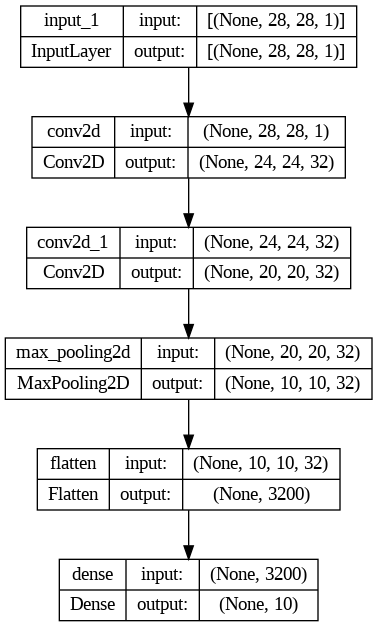

In [ ]:
# show plot of layers seem like diagram or UML chart to show defined model
import graphviz
tf.keras.utils.plot_model(model, to_file='model_plot.png',
                          show_shapes=True, show_layer_names=True)